In [25]:
import numpy as np
import pandas as pd
import fitsio
import os
import glob
import matplotlib.pyplot as plt

In [26]:
def list_exps(date):
    exps_daily = pd.read_csv("/global/cfs/cdirs/desi/spectro/redux/daily/exposures-daily.csv")
    #print(exps_daily.keys())
    ii = (exps_daily["NIGHT"]==date)
    #print(exps_daily["NIGHT"][ii])
    exps_daily = exps_daily[ii]
    return exps_daily

In [27]:
def read_sky_sframe(sframe_file):
    #print(sframe_file)
    try:
        h = fitsio.FITS(sframe_file)
        sel = h["FIBERMAP"]["OBJTYPE"].read() == "SKY"
        sky = h["FLUX"].read()[sel,:]
    except:
        sky = None
    return sky

In [28]:
def compute_sframe_difference(data_release_path, daily_path, date, expid):
    n_petals = 10
    bands = ['b', 'r', 'z']
    summary = {}
    summary['band'] = []
    summary['petal'] = []
    summary['diff_mean'] = []
    summary['diff_std'] = []
    summary['expid'] = []
    summary['night'] = []
    for i in range(n_petals):
        for band in bands:
            filename_A = '{}/{}/{:08d}/sframe-{}{}-{:08d}.fits'.format(data_release_path, date, expid, band, i, expid)
            sky_petal_A = read_sky_sframe(filename_A)
            filename_B = '{}/{}/{:08d}/sframe-{}{}-{:08d}.fits'.format(daily_path, date, expid, band, i, expid)
            sky_petal_B = read_sky_sframe(filename_B)
            if sky_petal_A is not None and sky_petal_B is not None:
                sky_diff = sky_petal_B-sky_petal_A
           #     proba = ient.compute_probability_distribution_2D(sky_petal)
           #     entropy =  ient.compute_entropy(proba)
                summary['band'].append(band)
                summary['petal'].append(i)
                summary['diff_mean'].append(sky_diff.mean())
                summary['diff_std'].append(sky_diff.std())
                summary['expid'].append(expid)
                summary['night'].append(date)
                print(date, expid, band, i, sky_diff.mean(), sky_diff.std())
    entropy_df = pd.DataFrame.from_dict(summary)
    filename = 'sky_diff_sframe_{}_{:08d}.csv'.format(date, expid)
    
    #os.makedirs(output_path, exist_ok=True) 
    entropy_df.to_csv(filename)
    
    #print(summary)

20210707 97847 b 0 0.2584847 4.408047
20210707 97847 r 0 0.009244185 28.872581
20210707 97847 z 0 0.24000084 39.70976
20210707 97847 b 1 -0.005304983 8.456118
20210707 97847 r 1 0.81582326 59.31126
20210707 97847 z 1 0.16420148 27.690195
20210707 97847 b 2 -0.06504597 3.5260987
20210707 97847 r 2 0.15743902 37.13659
20210707 97847 z 2 0.09556261 30.920605
20210707 97847 b 3 0.7019957 158.24583
20210707 97847 r 3 -0.28406715 28.595339
20210707 97847 z 3 0.60157406 164.54607
20210707 97847 b 4 0.052667424 4.387426
20210707 97847 r 4 0.32449183 70.764305
20210707 97847 z 4 -0.03295541 38.044735
20210707 97847 b 5 -0.20561141 4.7350307
20210707 97847 r 5 0.017959354 34.36608
20210707 97847 z 5 0.06714808 46.91319
20210707 97847 b 6 0.1846229 7.275152
20210707 97847 r 6 0.51150864 193.10457
20210707 97847 z 6 8.395779 2765.5615
20210707 97847 b 7 -0.04743854 3.7739987
20210707 97847 r 7 -0.28650174 35.808655
20210707 97847 z 7 -0.17129767 32.45906
20210707 97847 b 8 -0.07799743 4.19386
2021

20210707 97847 b 0 0.2584847 4.408047
20210707 97847 r 0 0.009244185 28.872581
20210707 97847 z 0 0.24000084 39.70976
20210707 97847 b 1 -0.005304983 8.456118
20210707 97847 r 1 0.81582326 59.31126
20210707 97847 z 1 0.16420148 27.690195
20210707 97847 b 2 -0.06504597 3.5260987
20210707 97847 r 2 0.15743902 37.13659
20210707 97847 z 2 0.09556261 30.920605
20210707 97847 b 3 0.7019957 158.24583
20210707 97847 r 3 -0.28406715 28.595339
20210707 97847 z 3 0.60157406 164.54607
20210707 97847 b 4 0.052667424 4.387426
20210707 97847 r 4 0.32449183 70.764305
20210707 97847 z 4 -0.03295541 38.044735
20210707 97847 b 5 -0.20561141 4.7350307
20210707 97847 r 5 0.017959354 34.36608
20210707 97847 z 5 0.06714808 46.91319
20210707 97847 b 6 0.1846229 7.275152
20210707 97847 r 6 0.51150864 193.10457
20210707 97847 z 6 8.395779 2765.5615
20210707 97847 b 7 -0.04743854 3.7739987
20210707 97847 r 7 -0.28650174 35.808655
20210707 97847 z 7 -0.17129767 32.45906
20210707 97847 b 8 -0.07799743 4.19386
2021

Text(0, 0.5, 'Mean Standard Deviation')

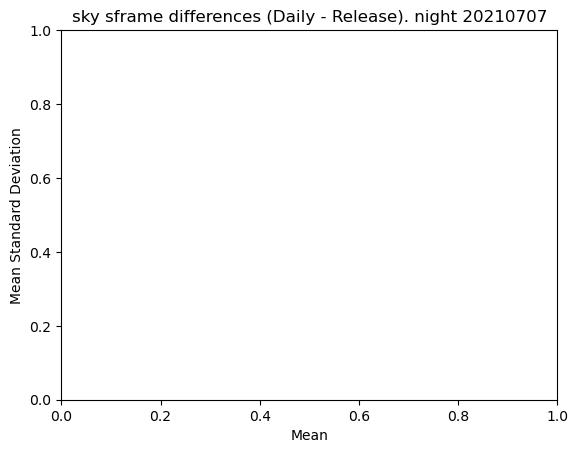

In [31]:
data_release_path = '/global/cfs/cdirs/desi/public/dr1/spectro/redux/guadalupe/exposures/'
daily_path = '/global/cfs/cdirs/desi/spectro/redux/daily/exposures/'

#20210707/00097853'
date = 20210707
exps = list_exps(date)

# compute differences
dates = list(exps["NIGHT"])
expids = list(exps["EXPID"])
for date, expid in zip(dates, expids):
    compute_sframe_difference(data_release_path, daily_path,date, expid)
    

Text(0, 0.5, 'Mean Standard Deviation')

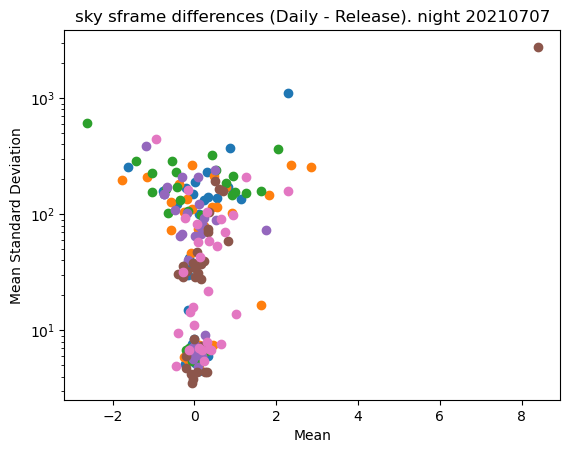

In [36]:
#plot 
diff_files = glob.glob('sky_diff_sframe_{}_*'.format(date))
for diff_file in diff_files:
    sky_diff = pd.read_csv(diff_file)
    plt.semilogy()
    plt.scatter(sky_diff['diff_mean'], sky_diff['diff_std'])
plt.title('sky sframe differences (Daily - Release). night {}'.format(date))
plt.xlabel('Mean')
plt.ylabel('Mean Standard Deviation')

In [37]:
data_release_path = '/global/cfs/cdirs/desi/public/dr1/spectro/redux/guadalupe/exposures/'
daily_path = '/global/cfs/cdirs/desi/spectro/redux/daily/exposures/'

#20210707/00097853'
date = 20210708
exps = list_exps(date)

# compute differences
dates = list(exps["NIGHT"])
expids = list(exps["EXPID"])
for date, expid in zip(dates, expids):
    compute_sframe_difference(data_release_path, daily_path,date, expid)
    

20210708 97938 b 0 0.14909329 5.23298
20210708 97938 r 0 0.15473923 184.3524
20210708 97938 z 0 -0.3815693 373.74698
20210708 97938 b 1 0.16790959 34.196987
20210708 97938 r 1 1.3600914 100.51756
20210708 97938 z 1 -0.45487502 154.07928
20210708 97938 b 2 -0.058361843 4.498368
20210708 97938 r 2 10848492.0 3713793000.0
20210708 97938 z 2 0.44212675 397.2523
20210708 97938 b 3 -0.21301182 135.34242
20210708 97938 r 3 -0.45724347 238.35353
20210708 97938 z 3 -0.057730276 122.9705
20210708 97938 b 4 0.0067849895 4.1384525
20210708 97938 r 4 0.15571022 102.30801
20210708 97938 z 4 -0.17421536 203.29199
20210708 97938 b 5 -0.22593346 53.806385
20210708 97938 r 5 -7.931997 900.32855
20210708 97938 z 5 -6.7197437 991.86285
20210708 97938 b 6 0.0775434 7.3173814
20210708 97938 r 6 0.06819871 157.57503
20210708 97938 z 6 0.38087872 147.46674
20210708 97938 b 7 -0.019225426 4.6531296
20210708 97938 r 7 -0.7534669 154.8811
20210708 97938 z 7 -0.18075246 99.12583
20210708 97938 b 8 0.18730707 234.

Text(0, 0.5, 'Mean Standard Deviation')

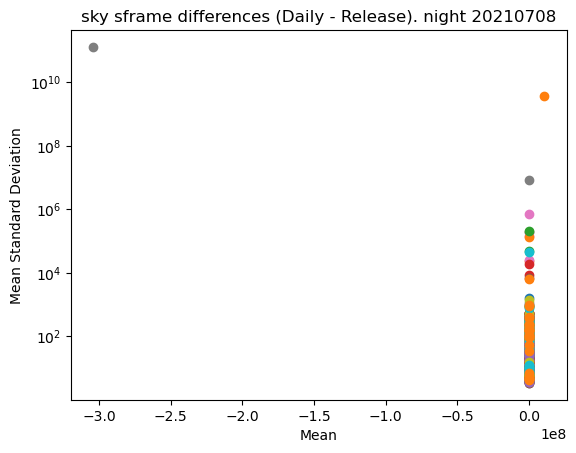

In [38]:
#plot 
diff_files = glob.glob('sky_diff_sframe_{}_*'.format(date))
for diff_file in diff_files:
    sky_diff = pd.read_csv(diff_file)
    plt.semilogy()
    plt.scatter(sky_diff['diff_mean'], sky_diff['diff_std'])
plt.title('sky sframe differences (Daily - Release). night {}'.format(date))
plt.xlabel('Mean')
plt.ylabel('Mean Standard Deviation')

In [39]:
data_release_path = '/global/cfs/cdirs/desi/spectro/redux/iron/exposures/'
daily_path = '/global/cfs/cdirs/desi/spectro/redux/daily/exposures/'

#20210707/00097853'
date = 20211212
exps = list_exps(date)

# compute differences
dates = list(exps["NIGHT"])
expids = list(exps["EXPID"])
for date, expid in zip(dates, expids):
    compute_sframe_difference(data_release_path, daily_path,date, expid)
    

20211212 113564 b 0 2.6550655 31.905304
20211212 113564 r 0 -3.0654633 748.3137
20211212 113564 z 0 -0.23713256 577.6006
20211212 113564 b 1 2.8046331 29.128351
20211212 113564 r 1 -0.2768526 549.87103
20211212 113564 z 1 -0.59428763 169.11678
20211212 113564 b 2 0.93902254 12.67171
20211212 113564 r 2 3.1646016 1218.1311
20211212 113564 z 2 -0.12023422 86.99612
20211212 113564 b 3 -3.7789047 1100.2822
20211212 113564 r 3 1.0886656 303.8553
20211212 113564 z 3 -2.815825 389.19186
20211212 113564 b 4 1.0223616 19.977333
20211212 113564 r 4 -0.8141936 1864.3641
20211212 113564 z 4 1.3866228 1771.305
20211212 113564 b 5 1.8526517 21.561478
20211212 113564 r 5 1.0027897 518.7611
20211212 113564 z 5 0.29150745 366.6807
20211212 113564 b 6 1.391734 13.614222
20211212 113564 r 6 10.964312 3484.3923
20211212 113564 z 6 0.5102933 312.86224
20211212 113564 b 7 1.6967839 15.421305
20211212 113564 r 7 16.094215 6249.1543
20211212 113564 z 7 -1.6506438 191.0073
20211212 113564 b 8 -2.4798684 15.127

(1, 4000)

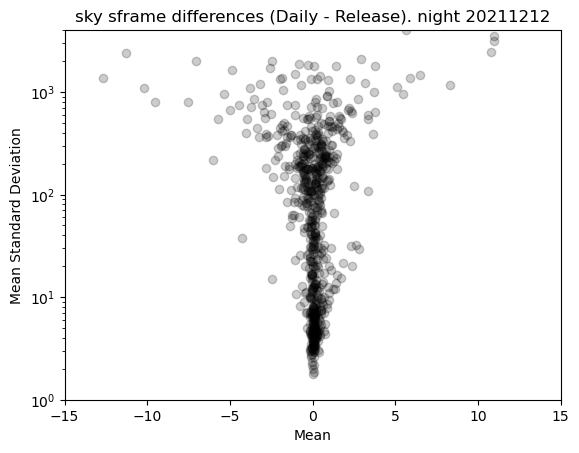

In [50]:
#plot 
date = 20211212
diff_files = glob.glob('sky_diff_sframe_{}_*'.format(date))
for diff_file in diff_files:
    sky_diff = pd.read_csv(diff_file)
    plt.semilogy()
    plt.scatter(sky_diff['diff_mean'], sky_diff['diff_std'], color='black', alpha=0.2)
plt.title('sky sframe differences (Daily - Release). night {}'.format(date))
plt.xlabel('Mean')
plt.ylabel('Mean Standard Deviation')
plt.xlim(-15,15)
plt.ylim(1,4000)

(1, 4000)

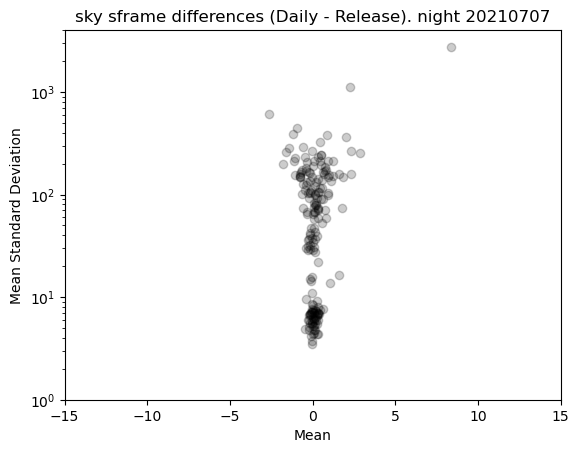

In [51]:
#plot 
date = 20210707
diff_files = glob.glob('sky_diff_sframe_{}_*'.format(date))
for diff_file in diff_files:
    sky_diff = pd.read_csv(diff_file)
    plt.semilogy()
    plt.scatter(sky_diff['diff_mean'], sky_diff['diff_std'],color='black', alpha=0.2)
plt.title('sky sframe differences (Daily - Release). night {}'.format(date))
plt.xlabel('Mean')
plt.ylabel('Mean Standard Deviation')
plt.xlim(-15,15)
plt.ylim(1,4000)